In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## Data process & EDA

In [3]:
#diabetic_Data = pd.read_csv('/content/gdrive/My Drive/diabetic_data.csv')
diabetic_Data = pd.read_csv('diabetic_data.csv')


In [4]:
diabetic_df = pd.DataFrame(diabetic_Data)

In [5]:
diabetic_df.shape

(101766, 50)

In [6]:
diabetic_df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [7]:
(diabetic_df == "?").sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [8]:
selected_diabetic_df = diabetic_df
selected_diabetic_df['discharge_disposition_id'] = selected_diabetic_df['discharge_disposition_id'].replace({13:0,14:0,19:0,20:0,21:0,
                                                                                                             7:1,
                                                                                                             3:2,4:2,5:2,9:2,27:2,
                                                                                                             6:3,8:3,
                                                                                                             12:4,15:4,16:4,17:4,
                                                                                                             18:5,25:5,26:5,
                                                                                                             22:6,23:6,24:4,
                                                                                                             28:7})
for item in selected_diabetic_df['discharge_disposition_id']:
    if item != 0 and item != 1 and item != 2 and item != 3 and item != 4 and item != 5 and item != 6 and item != 7:
        selected_diabetic_df['discharge_disposition_id'] = selected_diabetic_df['discharge_disposition_id'].replace({item:8})
        


In [9]:
selected_diabetic_df['admission_type_id'] = selected_diabetic_df['admission_type_id'].replace({2:1,7:1,
                                                                                               5:2,6:2,8:2})


In [10]:
selected_diabetic_df['admission_source_id'] = selected_diabetic_df['admission_source_id'].replace({2:1,3:1,
                                                                                                   4:2,5:2,6:2,11:2,18:2,19:2,
                                                                                                   7:3,10:3,25:3,
                                                                                                   8:4,22:4,
                                                                                                   9:5,15:5,17:5,20:5,21:5,
                                                                                                   26:6})
for item in selected_diabetic_df['admission_source_id']:
    if item != 0 and item != 1 and item != 2 and item != 3 and item != 4 and item != 5 and item != 6:
        selected_diabetic_df['admission_source_id'] = selected_diabetic_df['admission_source_id'].replace({item:7})
        

In [11]:
selected_diabetic_df['diag_1'] = selected_diabetic_df['diag_1'].replace({'?':0})
selected_diabetic_df['diag_2'] = selected_diabetic_df['diag_2'].replace({'?':0})
selected_diabetic_df['diag_3'] = selected_diabetic_df['diag_3'].replace({'?':0})

In [12]:
#if 0 in selected_diabetic_df['diag_3']:
 #   print('Ture')

In [13]:
selected_diabetic_df["race"].value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [14]:
selected_diabetic_df = selected_diabetic_df.replace({'Caucasian':1, 'AfricanAmerican':2, 'Hispanic': 3, 'Other': 3, 'Asian': 3})
selected_diabetic_df = selected_diabetic_df.replace({'Steady':1,'Up':1,'Down':1,'No':0})
selected_diabetic_df = selected_diabetic_df.replace({'>30':0,'<30':1,'NO':0})
selected_diabetic_df = selected_diabetic_df.replace({'Ch':1})
selected_diabetic_df = selected_diabetic_df.replace({'Yes':1})
selected_diabetic_df = selected_diabetic_df.replace({'None':0})
selected_diabetic_df = selected_diabetic_df.replace({'Female':0, 'Male':1})
selected_diabetic_df = selected_diabetic_df.replace({'Norm':1, '>7':2, '>8':2})
selected_diabetic_df = selected_diabetic_df.replace({'>200':2,'>300':2})
selected_diabetic_df = selected_diabetic_df.replace({'[0-10)': 0, '[10-20)': 10,'[20-30)': 20,'[30-40)': 30,'[40-50)': 40,'[50-60)': 50,'[60-70)': 60,'[70-80)': 70,'[80-90)': 80,'[90-100)': 90})
selected_diabetic_df = selected_diabetic_df.drop(columns=['encounter_id', 'patient_nbr','payer_code','medical_specialty','weight' ])


In [15]:
selected_diabetic_df = selected_diabetic_df.replace('?', np.nan) 
selected_diabetic_df = selected_diabetic_df.replace('Unknown/Invalid', np.nan) 
selected_diabetic_df = selected_diabetic_df.dropna()
# selected_diabetic_df['race'].dropna(inplace=True)
# selected_diabetic_df['gender'].dropna(inplace=True)

In [16]:
selected_diabetic_df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,1.0,0.0,0,2,5,1,1,41,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.0,10,1,1,3,3,59,0,18,...,0,1,0,0,0,0,0,1,1,0
2,2.0,0.0,20,1,1,3,2,11,5,13,...,0,0,0,0,0,0,0,0,1,0
3,1.0,1.0,30,1,1,3,2,44,1,16,...,0,1,0,0,0,0,0,1,1,0
4,1.0,1.0,40,1,1,3,1,51,0,8,...,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,2.0,1.0,70,1,2,3,3,51,0,16,...,0,1,0,0,0,0,0,1,1,0
101762,2.0,0.0,80,1,2,2,5,33,3,18,...,0,1,0,0,0,0,0,0,1,0
101763,1.0,1.0,70,1,1,3,1,53,0,9,...,0,1,0,0,0,0,0,1,1,0
101764,1.0,0.0,80,1,2,3,10,45,2,21,...,0,1,0,0,0,0,0,1,1,0


In [17]:
def map_diagnosis(data, cols):
    for col in cols:
        data.loc[(data[col].str.contains("V")) | (data[col].str.contains("E")), col] = 9
        data[col] = data[col].astype(np.float16)

    for col in cols:
        data["temp_diag"] = np.nan
        data.loc[(data[col]>=390) & (data[col]<=459) | (data[col]==785), "temp_diag"] = 1
        data.loc[(data[col]>=460) & (data[col]<=519) | (data[col]==786), "temp_diag"] = 2
        data.loc[(data[col]>=520) & (data[col]<=579) | (data[col]==787), "temp_diag"] = 3
        data.loc[(data[col]>=250) & (data[col]<251), "temp_diag"] = 4
        data.loc[(data[col]>=800) & (data[col]<=999), "temp_diag"] = 5
        data.loc[(data[col]>=710) & (data[col]<=739), "temp_diag"] = 6
        data.loc[(data[col]>=580) & (data[col]<=629) | (data[col] == 788), "temp_diag"] = 7
        data.loc[(data[col]>=140) & (data[col]<=239), "temp_diag"] = 8

        data["temp_diag"] = data["temp_diag"].fillna(9)
        data[col] = data["temp_diag"]
        data = data.drop("temp_diag", axis=1)

    return data

In [18]:
selected_diabetic_df = map_diagnosis(selected_diabetic_df,["diag_1","diag_2","diag_3"])

In [19]:
#selected_diabetic_df[['diag_1']]
selected_diabetic_df.groupby("diag_1").count()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
diag_1,,,,,,,,,,,,,,,,,,,,,
1.0,29753,29753,29753,29753,29753,29753,29753,29753,29753,29753,...,29753,29753,29753,29753,29753,29753,29753,29753,29753,29753
2.0,14109,14109,14109,14109,14109,14109,14109,14109,14109,14109,...,14109,14109,14109,14109,14109,14109,14109,14109,14109,14109
3.0,9297,9297,9297,9297,9297,9297,9297,9297,9297,9297,...,9297,9297,9297,9297,9297,9297,9297,9297,9297,9297
4.0,8568,8568,8568,8568,8568,8568,8568,8568,8568,8568,...,8568,8568,8568,8568,8568,8568,8568,8568,8568,8568
5.0,6815,6815,6815,6815,6815,6815,6815,6815,6815,6815,...,6815,6815,6815,6815,6815,6815,6815,6815,6815,6815
6.0,4826,4826,4826,4826,4826,4826,4826,4826,4826,4826,...,4826,4826,4826,4826,4826,4826,4826,4826,4826,4826
7.0,5026,5026,5026,5026,5026,5026,5026,5026,5026,5026,...,5026,5026,5026,5026,5026,5026,5026,5026,5026,5026
8.0,3353,3353,3353,3353,3353,3353,3353,3353,3353,3353,...,3353,3353,3353,3353,3353,3353,3353,3353,3353,3353
9.0,17745,17745,17745,17745,17745,17745,17745,17745,17745,17745,...,17745,17745,17745,17745,17745,17745,17745,17745,17745,17745


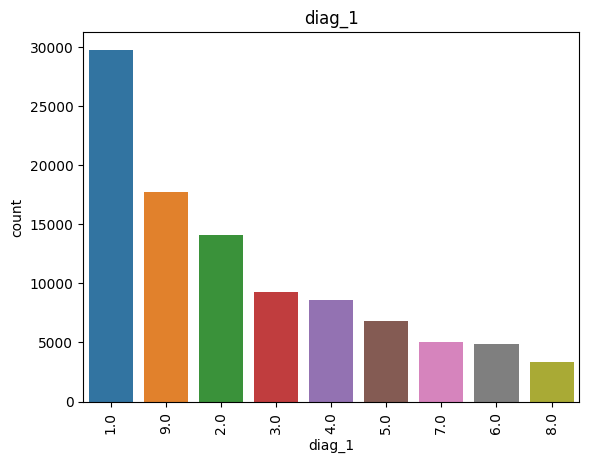

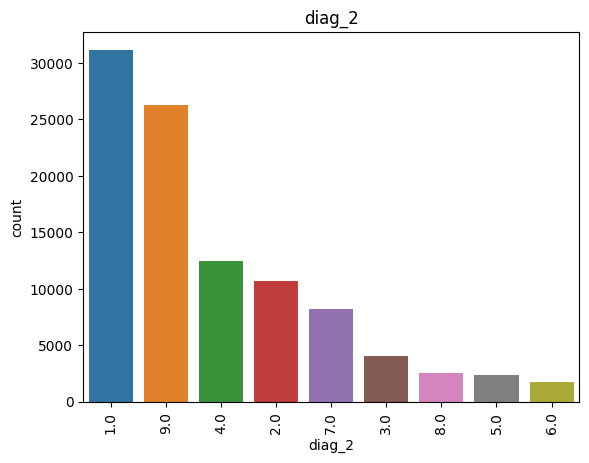

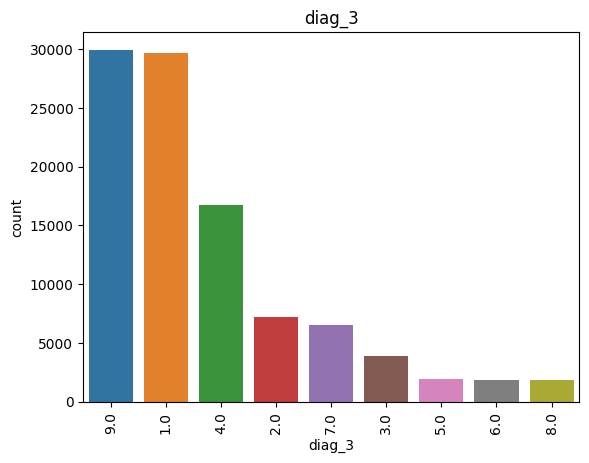

In [20]:
def plot_diags(col,data):
    sns.countplot(x = col, data = data,
            order = data[f"{col}"].value_counts().index)
    plt.xticks(rotation = 90)
    plt.title(col)
    plt.show()

diag_cols = ["diag_1","diag_2","diag_3"]

for diag in diag_cols:
    plot_diags(diag,selected_diabetic_df)

In [21]:
selected_diabetic_df.isnull().any()

race                        False
gender                      False
age                         False
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                      False
diag_2                      False
diag_3                      False
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide               False
glipizide                   False
glyburide                   False
tolbutamide                 False
pioglitazone                False
rosiglitazone 

In [22]:
from sklearn import preprocessing

# Whole Dataset


In [22]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,recall_score,precision_score,roc_curve

X = selected_diabetic_df.iloc[:,0:44]
y = selected_diabetic_df['readmitted']

In [160]:
scaler = preprocessing.MinMaxScaler() 
scaled_values = scaler.fit_transform(X) 
X.loc[:,:] = scaled_values
X

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,0.0,0.0,0.000000,0.333333,0.625,0.000000,0.000000,0.305344,0.000000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.111111,0.000000,0.125,0.333333,0.153846,0.442748,0.000000,0.2125,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.5,0.0,0.222222,0.000000,0.125,0.333333,0.076923,0.076336,0.833333,0.1500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.333333,0.000000,0.125,0.333333,0.076923,0.328244,0.166667,0.1875,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,1.0,0.444444,0.000000,0.125,0.333333,0.000000,0.381679,0.000000,0.0875,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0.5,1.0,0.777778,0.000000,0.250,0.333333,0.153846,0.381679,0.000000,0.1875,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
101762,0.5,0.0,0.888889,0.000000,0.250,0.166667,0.307692,0.244275,0.500000,0.2125,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
101763,0.0,1.0,0.777778,0.000000,0.125,0.333333,0.000000,0.396947,0.000000,0.1000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
101764,0.0,0.0,0.888889,0.000000,0.250,0.333333,0.692308,0.335878,0.333333,0.2500,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
# Class 1 accounts for only a small part of the class compared to class 2
# print('Before OverSampling, counts of label 1: {}'.format(sum(y_train==1)))
# print('Before OverSampling, counts of label 0: {} \n'.format(sum(y_train==0)))

In [ ]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=2)
# X_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())

# print('After OverSampling, the shape of train_x: {}'.format(X_train_res))
# print('After OverSampling, the shape of train_y: {}'.format(y_train_res.shape))

# print('After OverSampling, counts of label 1: {}'.format(sum(y_train_res == 1)))
# print('After OverSampling, counts of label 0: {}'.format(sum(y_train_res == 0)))

In [ ]:
# predictors = list(X_train)[:]
# predictors

# SelectDataFunctions

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

def SelectData(X, y, selected_features, k=None):
  if k == None:
    s_X = X[selected_features]
       
  else:
    if selected_features == "filter_chi2":
      s_X = SelectKBest(chi2, k=k).fit_transform(X, y)
    if selected_features == "filter_var":
      var_selector = VarianceThreshold(k).fit(X, y)
      s_X = var_selector.transform(X)
    if selected_features == "filter_f":
      s_X = SelectKBest(f_classif, k=k).fit_transform(X, y)
    if selected_features == "filter_mutual":
      mutual_info_classif_selector = SelectKBest(mutual_info_classif, k=k).fit(X, y)
      s_X = mutual_info_classif_selector.transform(X)
  s_y = y
  return s_X, s_y

def SplitData(X, y, test_size=0.2):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
  return X_train, X_test, y_train, y_test

def SmoteData(X_train, y_train, random_state=2):
  sm = SMOTE(random_state = random_state)
  X_train_res, y_train_res = sm.fit_resample(X_train,y_train)
  return X_train_res, y_train_res

def GetTrainData(X, y, selected_features, k=None, test_size=0.2, random_state=2):
  s_X, s_y = SelectData(X, y, selected_features, k)
  X_train, X_test, y_train, y_test = SplitData(s_X, s_y, test_size)
  X_train_res, y_train_res = SmoteData(X_train, y_train, random_state)
  if k == None:
    X_test_nd = X_test.to_numpy()
    y_test_nd = y_test.to_numpy()
  else:
    X_test_nd = X_test
    y_test_nd = y_test
  return X_train_res, X_test_nd, y_train_res, y_test_nd


# KNN



```
# This is formatted as code
```

## Filter method setup

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

def SelectData(X, y, selected_features, k=None):
  if k == None:
    s_X = X[selected_features]
       
  else:
    if selected_features == "filter_chi2":
      s_X = SelectKBest(chi2, k=k).fit_transform(X, y)
    if selected_features == "filter_var":
      var_selector = VarianceThreshold(k).fit(X, y)
      s_X = var_selector.transform(X)
    if selected_features == "filter_f":
      s_X = SelectKBest(f_classif, k=k).fit_transform(X, y)
    if selected_features == "filter_mutual":
      mutual_info_classif_selector = SelectKBest(mutual_info_classif, k=k).fit(X, y)
      s_X = mutual_info_classif_selector.transform(X)
  s_y = y
  return s_X, s_y


def SplitData(X, y, test_size=0.2):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
  return X_train, X_test, y_train, y_test

def SmoteData(X_train, y_train, random_state=2):
  sm = SMOTE(random_state = random_state)
  X_train_res, y_train_res = sm.fit_resample(X_train,y_train)
  return X_train_res, y_train_res

def GetTrainData(X, y, selected_features, k=None, test_size=0.2, random_state=2):
  s_X, s_y = SelectData(X, y, selected_features, k)
  X_train, X_test, y_train, y_test = SplitData(s_X, s_y, test_size)
  X_train_res, y_train_res = SmoteData(X_train, y_train, random_state)

  return X_train_res, X_test, y_train_res, y_test


## Filter - Chi_square

In [28]:
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_chi2", k=15)

In [29]:
#define the model and parameters
knn = KNeighborsClassifier()

parameters = {'n_neighbors':[1,3,7,10,15]}

#Fit the model
model = GridSearchCV(knn, param_grid=parameters)
model.fit(X_train, y_train)

#predictions on test data
Y_pred = model.predict(X_test)
result2 = classification_report(y_test, Y_pred)
print (result2)

              precision    recall  f1-score   support

           0       0.90      0.84      0.87     17711
           1       0.14      0.21      0.17      2188

    accuracy                           0.77     19899
   macro avg       0.52      0.53      0.52     19899
weighted avg       0.81      0.77      0.79     19899



## Filter - ANOVA F-value

In [219]:
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_f", k=15)

In [220]:
#define the model and parameters
knn = KNeighborsClassifier()

parameters = {'n_neighbors':[1,3,7,10,15]}

#Fit the model
model = GridSearchCV(knn, param_grid=parameters)
model.fit(X_train, y_train)

#predictions on test data
Y_pred = model.predict(X_test)
result2 = classification_report(y_test, Y_pred)
print (result2)

              precision    recall  f1-score   support

           0       0.90      0.80      0.85     17711
           1       0.15      0.27      0.19      2188

    accuracy                           0.75     19899
   macro avg       0.52      0.54      0.52     19899
weighted avg       0.82      0.75      0.78     19899



## Filter - Mutual Information

In [221]:
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_mutual", k=15)

In [222]:
#define the model and parameters
knn = KNeighborsClassifier()

parameters = {'n_neighbors':[1,3,7,10,15]}

#Fit the model
model = GridSearchCV(knn, param_grid=parameters)
model.fit(X_train, y_train)

#predictions on test data
Y_pred = model.predict(X_test)
result2 = classification_report(y_test, Y_pred)
print (result2)

              precision    recall  f1-score   support

           0       0.90      0.81      0.85     17711
           1       0.14      0.25      0.18      2188

    accuracy                           0.75     19899
   macro avg       0.52      0.53      0.52     19899
weighted avg       0.81      0.75      0.78     19899



# Decision Tree

In [223]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import VarianceThreshold

In [224]:
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=10)

In [225]:
dtree_pred = dtree.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(dtree_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,2979,508,3487
1,373,65,438
All,3352,573,3925


In [226]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, dtree_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, dtree_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, dtree_pred)))

accuracy_dtree = accuracy_score(y_test, dtree_pred)
precision_dtree = precision_score(y_test, dtree_pred)
recall_dtree = recall_score(y_test, dtree_pred)

Accuracy is 0.79
Precision is 0.15
Recall is 0.19


## Best performance:tunning parameter_grid search

In [ ]:
X = selected_diabetic_df.iloc[:,0:44]
y = selected_diabetic_df['readmitted']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [ ]:
from imblearn.under_sampling import NeighbourhoodCleaningRule
ncr = NeighbourhoodCleaningRule()
X_smo, y_smo = ncr.fit_resample(X_train, y_train)

In [41]:
X_smo.shape

(52174, 44)

In [42]:
X_test.shape

(29848, 44)

In [43]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]}

# instantiate the model
dtree = DecisionTreeClassifier(random_state = 2)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_smo, y_smo)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=2),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='accuracy')

In [44]:
tree.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 100,
 'min_samples_split': 50}

In [47]:
from sklearn.metrics import classification_report
m6 = DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=100,min_samples_split=50)
m6.fit(X_smo, y_smo)
y_pred_tdt=m6.predict(X_test)
Train_Score_tdt = m6.score(X_smo, y_smo)
Test_Score_tdt = accuracy_score(y_test,y_pred_tdt)

print('Training Accuracy :',Train_Score_tdt)
print('Testing Accuracy  :',Test_Score_tdt)
print(classification_report(y_test,y_pred_tdt))

Training Accuracy : 0.852627745620424
Testing Accuracy  : 0.8831412489949075
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     26477
           1       0.37      0.05      0.09      3371

    accuracy                           0.88     29848
   macro avg       0.63      0.52      0.51     29848
weighted avg       0.83      0.88      0.84     29848



In [45]:
predictors = list(X_train)[:]

                     Feature  Importance
15                    diag_3    0.002418
6           time_in_hospital    0.003950
9            num_medications    0.007244
43               diabetesMed    0.007724
3          admission_type_id    0.009362
11          number_emergency    0.016493
2                        age    0.025715
16          number_diagnoses    0.031827
4   discharge_disposition_id    0.354632
12          number_inpatient    0.540635


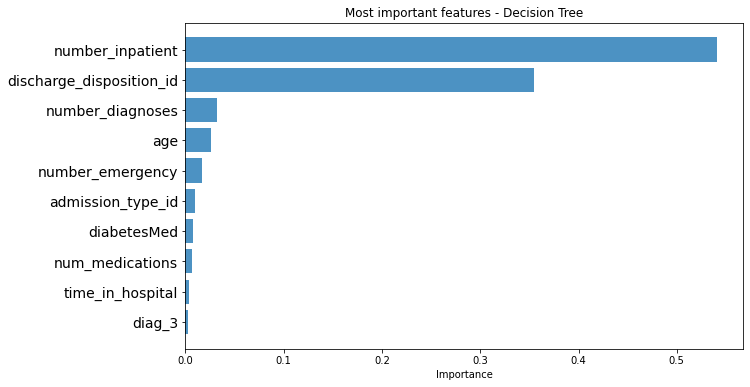

In [48]:
feature_names = X_train.columns
feature_imports = m6.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
print(most_imp_features)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree')
plt.show()

## Other custom feature combination: Decision Tree + feature selection method

In [49]:
from sklearn.metrics import classification_report
m4 = DecisionTreeClassifier()
m4.fit(X_train, y_train)
y_pred_dt=m4.predict(X_test)
Train_Score_dt = m4.score(X_train, y_train)
Test_Score_dt = accuracy_score(y_test, y_pred_dt)

print('Training Accuracy :',Train_Score_dt)
print('Testing Accuracy :',Test_Score_dt)
print(classification_report(y_test, y_pred_dt))

Training Accuracy : 0.9999856412612717
Testing Accuracy : 0.7899356740820156
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     26477
           1       0.15      0.18      0.16      3371

    accuracy                           0.79     29848
   macro avg       0.52      0.52      0.52     29848
weighted avg       0.81      0.79      0.80     29848



In [50]:
def trainDT(X_train, X_test, y_train, y_test):
  model = DecisionTreeClassifier()
  model.fit(X_train,y_train)
  # make predictions for test data
  y_pre = model.predict(X_test)
  #predictions = [round(int(value)) for value in y_pre]
  # evaluate predictions
  #accuracy = accuracy_score(y_test,predictions)
  #print("Accuracy: %.2f%%" % (accuracy * 100.0))

  result = classification_report(y_test, y_pre)
  print(result)
  print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pre)))
  print("Precision is {0:.2f}".format(precision_score(y_test, y_pre)))
  print("Recall is {0:.2f}".format(recall_score(y_test, y_pre)))

In [51]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

def SelectData(X, y, selected_features, k=None):
  if k == None:
    s_X = X[selected_features]
       
  else:
    if selected_features == "filter_chi2":
      s_X = SelectKBest(chi2, k=k).fit_transform(X, y)
    if selected_features == "filter_var":
      var_selector = VarianceThreshold(k).fit(X, y)
      s_X = var_selector.transform(X)
    if selected_features == "filter_f":
      s_X = SelectKBest(f_classif, k=k).fit_transform(X, y)
    if selected_features == "filter_mutual":
      mutual_info_classif_selector = SelectKBest(mutual_info_classif, k=k).fit(X, y)
      s_X = mutual_info_classif_selector.transform(X)
  s_y = y
  return s_X, s_y
  
def SplitData(X, y, test_size=0.2):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
  return X_train, X_test, y_train, y_test

def SmoteData(X_train, y_train, random_state=2):
  ncr = NeighbourhoodCleaningRule()
  X_train_res, y_train_res = ncr.fit_resample(X_train, y_train)
  return X_train_res, y_train_res

def GetTrainData(X, y, selected_features, k=None, test_size=0.2, random_state=2):
  s_X, s_y = SelectData(X, y, selected_features, k)
  X_train, X_test, y_train, y_test = SplitData(s_X, s_y, test_size)
  X_train_res, y_train_res = SmoteData(X_train, y_train, random_state)
  if k == None:
    X_test_nd = X_test.to_numpy()
    y_test_nd = y_test.to_numpy()
  else:
    X_test_nd = X_test
    y_test_nd = y_test
  return X_train_res, X_test_nd, y_train_res, y_test_nd

In [52]:
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_var", k=0.04)
trainDT(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.90      0.83      0.86     17711
           1       0.14      0.23      0.18      2188

    accuracy                           0.76     19899
   macro avg       0.52      0.53      0.52     19899
weighted avg       0.81      0.76      0.79     19899

Accuracy is 0.76
Precision is 0.14
Recall is 0.23


In [ ]:
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_var", k=0.05)
trainDT(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.90      0.83      0.86     17711
           1       0.14      0.24      0.18      2188

    accuracy                           0.76     19899
   macro avg       0.52      0.53      0.52     19899
weighted avg       0.81      0.76      0.79     19899

Accuracy is 0.76
Precision is 0.14
Recall is 0.24


In [ ]:
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_var", k=0.06)
trainDT(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.90      0.82      0.86     17711
           1       0.14      0.23      0.17      2188

    accuracy                           0.76     19899
   macro avg       0.52      0.53      0.52     19899
weighted avg       0.81      0.76      0.78     19899

Accuracy is 0.76
Precision is 0.14
Recall is 0.23


In [ ]:
#k=15, chi_square
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_chi2", k=15)
trainDT(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.90      0.82      0.86     17711
           1       0.14      0.25      0.18      2188

    accuracy                           0.76     19899
   macro avg       0.52      0.53      0.52     19899
weighted avg       0.82      0.76      0.78     19899

Accuracy is 0.76
Precision is 0.14
Recall is 0.25


In [ ]:
#k=20
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_chi2", k=20)
trainDT(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.90      0.83      0.86     17711
           1       0.15      0.26      0.19      2188

    accuracy                           0.76     19899
   macro avg       0.53      0.54      0.53     19899
weighted avg       0.82      0.76      0.79     19899

Accuracy is 0.76
Precision is 0.15
Recall is 0.26


In [ ]:
#k=25
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_chi2", k=25)
trainDT(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.90      0.82      0.86     17711
           1       0.14      0.24      0.18      2188

    accuracy                           0.76     19899
   macro avg       0.52      0.53      0.52     19899
weighted avg       0.81      0.76      0.78     19899

Accuracy is 0.76
Precision is 0.14
Recall is 0.24


In [209]:
#k=30
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_chi2", k=30)
trainDT(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.90      0.82      0.86     17711
           1       0.15      0.24      0.18      2188

    accuracy                           0.76     19899
   macro avg       0.52      0.53      0.52     19899
weighted avg       0.82      0.76      0.79     19899

Accuracy is 0.76
Precision is 0.15
Recall is 0.24


In [210]:
#k=35
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_chi2", k=35)
trainDT(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.90      0.83      0.86     17711
           1       0.14      0.23      0.18      2188

    accuracy                           0.76     19899
   macro avg       0.52      0.53      0.52     19899
weighted avg       0.81      0.76      0.79     19899

Accuracy is 0.76
Precision is 0.14
Recall is 0.23


In [211]:
#k=40
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_chi2", k=40)
trainDT(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.90      0.83      0.86     17711
           1       0.15      0.25      0.19      2188

    accuracy                           0.77     19899
   macro avg       0.53      0.54      0.53     19899
weighted avg       0.82      0.77      0.79     19899

Accuracy is 0.77
Precision is 0.15
Recall is 0.25


In [212]:
# k=15 Anova_f_value
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_f", k=15)
trainDT(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.90      0.82      0.86     17711
           1       0.15      0.26      0.19      2188

    accuracy                           0.76     19899
   macro avg       0.52      0.54      0.52     19899
weighted avg       0.82      0.76      0.78     19899

Accuracy is 0.76
Precision is 0.15
Recall is 0.26


In [213]:
# k=25
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_f", k=25)
trainDT(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.90      0.82      0.86     17711
           1       0.14      0.24      0.18      2188

    accuracy                           0.76     19899
   macro avg       0.52      0.53      0.52     19899
weighted avg       0.81      0.76      0.78     19899

Accuracy is 0.76
Precision is 0.14
Recall is 0.24


In [214]:
# k=35
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_f", k=35)
trainDT(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.90      0.83      0.86     17711
           1       0.16      0.26      0.20      2188

    accuracy                           0.77     19899
   macro avg       0.53      0.54      0.53     19899
weighted avg       0.82      0.77      0.79     19899

Accuracy is 0.77
Precision is 0.16
Recall is 0.26


In [215]:
#k=15 mutation information
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_mutual", k=15)
trainDT(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.90      0.83      0.86     17711
           1       0.15      0.26      0.19      2188

    accuracy                           0.76     19899
   macro avg       0.53      0.54      0.53     19899
weighted avg       0.82      0.76      0.79     19899

Accuracy is 0.76
Precision is 0.15
Recall is 0.26


In [216]:
#k=25
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_mutual", k=25)
trainDT(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.90      0.83      0.86     17711
           1       0.15      0.25      0.19      2188

    accuracy                           0.76     19899
   macro avg       0.52      0.54      0.52     19899
weighted avg       0.82      0.76      0.79     19899

Accuracy is 0.76
Precision is 0.15
Recall is 0.25


In [217]:
#k=35
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_mutual", k=35)
trainDT(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.90      0.82      0.86     17711
           1       0.14      0.25      0.18      2188

    accuracy                           0.76     19899
   macro avg       0.52      0.53      0.52     19899
weighted avg       0.82      0.76      0.78     19899

Accuracy is 0.76
Precision is 0.14
Recall is 0.25


In [218]:
#k=40
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_mutual", k=40)
trainDT(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.90      0.82      0.86     17711
           1       0.15      0.25      0.19      2188

    accuracy                           0.76     19899
   macro avg       0.52      0.54      0.52     19899
weighted avg       0.82      0.76      0.78     19899

Accuracy is 0.76
Precision is 0.15
Recall is 0.25


In [ ]:
from sklearn.feature_selection import RFE

estimator = DecisionTreeClassifier()
selector = RFE(estimator=estimator, n_features_to_select=5)

In [ ]:
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=10)

In [ ]:
dtree_pred_t = dtree.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(dtree_pred_t, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,7041,773,7814
1,939,109,1048
All,7980,882,8862


In [ ]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, dtree_pred_t)))
print("Precision is {0:.2f}".format(precision_score(y_test, dtree_pred_t)))
print("Recall is {0:.2f}".format(recall_score(y_test, dtree_pred_t)))

accuracy_dtree = accuracy_score(y_test, dtree_pred_t)
precision_dtree = precision_score(y_test, dtree_pred_t)
recall_dtree = recall_score(y_test, dtree_pred_t)

Accuracy is 0.82
Precision is 0.16
Recall is 0.14


# Logistic Regression

## Filter

In [53]:
from sklearn.linear_model import LogisticRegression 
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_chi2",k=23)
lr = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
lr_matrix = confusion_matrix(y_test, y_pred_lr, labels=[1,0])
print('Confusion matrix : \n',lr_matrix)
lr_matrix = classification_report(y_test, y_pred_lr,labels=[1,0])
print('Classification report : \n',lr_matrix)

Confusion matrix : 
 [[   86  2102]
 [  143 17568]]
Classification report : 
               precision    recall  f1-score   support

           1       0.38      0.04      0.07      2188
           0       0.89      0.99      0.94     17711

    accuracy                           0.89     19899
   macro avg       0.63      0.52      0.51     19899
weighted avg       0.84      0.89      0.84     19899



## Wrapper

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

X_t = X
# define the method
model = LogisticRegression()
rfe = RFE(estimator= model, n_features_to_select=3)
# fit the model
rfe.fit(X_t, y)

# Automatic selection
# rfe = RFECV(estimator=LogisticRegression())
# pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# # evaluate model
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_accuracy = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# # report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_accuracy), std(n_accuracy)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


RFE(estimator=LogisticRegression(), n_features_to_select=3)

In [ ]:
# Print the selected features
for i in range(X_t.shape[1]):
  print('Column: %d, Selected %s, Rank: %3f' %(i,rfe.support_[i],rfe.ranking_[i]))

Column: 0, Selected False, Rank: 13.000000
Column: 1, Selected False, Rank: 22.000000
Column: 2, Selected False, Rank: 26.000000
Column: 3, Selected False, Rank: 16.000000
Column: 4, Selected False, Rank: 7.000000
Column: 5, Selected False, Rank: 19.000000
Column: 6, Selected False, Rank: 15.000000
Column: 7, Selected False, Rank: 30.000000
Column: 8, Selected False, Rank: 20.000000
Column: 9, Selected False, Rank: 33.000000
Column: 10, Selected False, Rank: 24.000000
Column: 11, Selected False, Rank: 14.000000
Column: 12, Selected True, Rank: 1.000000
Column: 13, Selected False, Rank: 23.000000
Column: 14, Selected False, Rank: 29.000000
Column: 15, Selected False, Rank: 25.000000
Column: 16, Selected False, Rank: 27.000000
Column: 17, Selected False, Rank: 17.000000
Column: 18, Selected False, Rank: 10.000000
Column: 19, Selected False, Rank: 4.000000
Column: 20, Selected False, Rank: 2.000000
Column: 21, Selected False, Rank: 6.000000
Column: 22, Selected True, Rank: 1.000000
Column

In [56]:
pos_1 = 12
colname_1 = X.columns[pos_1]
pos_2 = 22
colname_2 = X.columns[pos_2]
pos_3 = 27
colname_3 = X.columns[pos_3]
print (colname_1)
print (colname_2)
print (colname_3)


number_inpatient
chlorpropamide
tolbutamide


In [57]:
# transform the data
X_t= rfe.transform(X_t)

In [58]:
# Smote 
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_t, y, test_size=0.20, random_state=0,stratify=y)

sm = SMOTE(random_state=2)
X_train_t_res, y_train_t_res = sm.fit_resample(X_train_t,y_train_t.ravel())
print('After OverSampling, counts of label 1: {}'.format(sum(y_train_t_res == 1)))
print('After OverSampling, counts of label 0: {}'.format(sum(y_train_t_res == 0)))

After OverSampling, counts of label 1: 70658
After OverSampling, counts of label 0: 70658


In [59]:
lr_t = LogisticRegression(random_state=0).fit(X_train_t_res, y_train_t_res)

In [60]:
lr_t_prd = lr_t.predict(X_test_t)
print("Accuracy is {0:.2f}".format(accuracy_score(y_test_t, lr_t_prd)))
print("Precision is {0:.2f}".format(precision_score(y_test_t, lr_t_prd)))
print("Recall is {0:.2f}".format(recall_score(y_test_t, lr_t_prd)))

Accuracy is 0.66
Precision is 0.16
Recall is 0.49


# Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=2)
rf=RandomForestClassifier(random_state=2)
rf.fit(X_train, y_train)
pred20=rf.predict(X_test)

result20 = classification_report(y_test, pred20)
print (result20)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     22081
           1       0.51      0.01      0.02      2792

    accuracy                           0.89     24873
   macro avg       0.70      0.50      0.48     24873
weighted avg       0.85      0.89      0.84     24873



## 10-fold validation Grid Search

In [94]:
from sklearn.model_selection import StratifiedKFold

In [95]:
param_grid = { 
    'n_estimators': [50,100,150,200],
    'max_features': ['auto', 'log2',40],
    'criterion' :['gini']
}
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=2)
cvKFold=StratifiedKFold(n_splits=10, shuffle=True, random_state=2)

In [96]:
grid_rf = GridSearchCV(RandomForestClassifier(random_state=2), param_grid, return_train_score=True, cv = cvKFold)
grid_rf.fit(X_train, y_train)
print(grid_rf.best_params_['n_estimators'])
print("{:.4f}".format(grid_rf.best_score_))
print("{:.4f}".format(grid_rf.score(X_test, y_test)))

150
0.8880
0.8880


In [97]:
print(grid_rf.best_params_['n_estimators'])
print(grid_rf.best_params_['max_features'])
print(grid_rf.best_params_['criterion'])

150
log2
gini


In [98]:
param_grid = { 
    'n_estimators': [150],
    'max_features': ['auto'],
    'criterion' :['gini'],
    'max_depth' : [50,None],
}
cvKFold=StratifiedKFold(n_splits=10, shuffle=True, random_state=2)

In [99]:
grid_rf = GridSearchCV(RandomForestClassifier(random_state=2), param_grid, return_train_score=True, cv = cvKFold)
grid_rf.fit(X_train, y_train)
print(grid_rf.best_params_)
print("{:.4f}".format(grid_rf.best_score_))
print("{:.4f}".format(grid_rf.score(X_test, y_test)))

{'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 150}
0.8879
0.8881


In [28]:
rf=RandomForestClassifier(random_state=2,n_estimators= 150,max_depth=50)
rf.fit(X_train, y_train)
pred20=rf.predict(X_test)

result20 = classification_report(y_test, pred20)
print (result20)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     22081
           1       0.61      0.01      0.02      2792

    accuracy                           0.89     24873
   macro avg       0.75      0.50      0.48     24873
weighted avg       0.86      0.89      0.84     24873



## Feature Selection

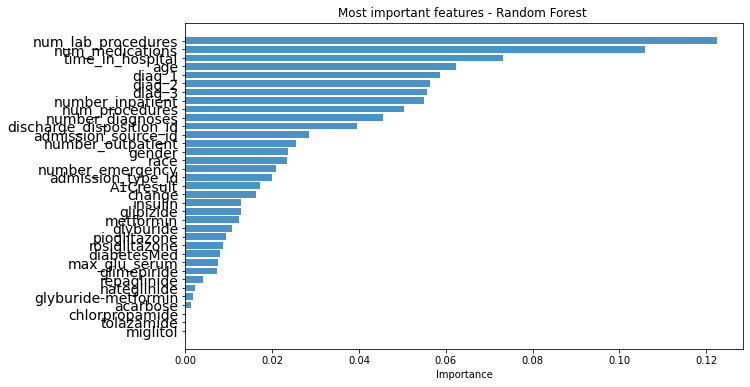

In [101]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = rf.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(35, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest ')
plt.show()

In [102]:
feature_list=most_imp_features['Feature']

In [103]:
X_train_fs=X_train[feature_list]

In [104]:
X_test_fs=X_test[feature_list]

In [105]:
rf=RandomForestClassifier(random_state=2,n_estimators= 150,max_depth=50)
rf.fit(X_train_fs, y_train)
pred20=rf.predict(X_test_fs)

result20 = classification_report(y_test, pred20)
print (result20)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     22081
           1       0.57      0.01      0.02      2792

    accuracy                           0.89     24873
   macro avg       0.73      0.50      0.48     24873
weighted avg       0.85      0.89      0.84     24873



## Bagging classifier

In [106]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [107]:
bc = BaggingClassifier(base_estimator=RandomForestClassifier(),
                       random_state=2)
bc.fit(X_train, y_train) 

BaggingClassifier(base_estimator=RandomForestClassifier(), random_state=2)

In [108]:
y_pred = bc.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.502169572915246

In [109]:
result10 = classification_report(y_test, y_pred)
print (result10)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     22081
           1       0.65      0.00      0.01      2792

    accuracy                           0.89     24873
   macro avg       0.77      0.50      0.47     24873
weighted avg       0.86      0.89      0.84     24873



In [110]:
bc = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators= 150,max_depth=50),
                       random_state=2)
bc.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=50,
                                                        n_estimators=150),
                  random_state=2)

In [111]:
y_pred = bc.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.5021469290132488

In [112]:
result10 = classification_report(y_test, y_pred)
print (result10)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     22081
           1       0.62      0.00      0.01      2792

    accuracy                           0.89     24873
   macro avg       0.75      0.50      0.47     24873
weighted avg       0.86      0.89      0.84     24873



# Naive Bayes

## Training

In [113]:
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_var", k=0.06)

In [ ]:
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_f", k=27)

In [ ]:
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_chi2", k=25)

In [115]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB 

gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [116]:
gnb.fit(X_train,y_train)
gnb.score(X_train,y_train)

0.8553714350129636

In [117]:
#Gaussian Bayes
y_pred_gnb = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_pred_gnb,y_test)
gnb_recall = recall_score(y_pred_gnb,y_test)
gnb_precision = precision_score(y_pred_gnb,y_test)

In [118]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_pred_gnb,y_test)))
print("Precision is {0:.2f}".format(recall_score(y_pred_gnb,y_test)))
print("Recall is {0:.2f}".format(precision_score(y_pred_gnb,y_test)))
print("f1 is {0:.2f}".format(f1_score(y_pred_gnb,y_test)))

Accuracy is 0.89
Precision is 0.00
Recall is 0.00
f1 is 0.00


In [119]:
#Bernoulli Bayes
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
bnb_accuracy = accuracy_score(y_pred_bnb,y_test)
bnb_recall = recall_score(y_pred_bnb,y_test)
bnb_precision = precision_score(y_pred_bnb,y_test)

In [120]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_pred_bnb,y_test)))
print("Precision is {0:.2f}".format(recall_score(y_pred_bnb,y_test)))
print("Recall is {0:.2f}".format(precision_score(y_pred_bnb,y_test)))
print("f1 is {0:.2f}".format(f1_score(y_pred_bnb,y_test)))

Accuracy is 0.89
Precision is 0.00
Recall is 0.00
f1 is 0.00


In [121]:
# Polynomial Bayes
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
mnb_accuracy = accuracy_score(y_pred_mnb,y_test)
mnb_recall = recall_score(y_pred_mnb,y_test)
mnb_precision = precision_score(y_pred_mnb,y_test)

In [122]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_pred_mnb,y_test)))
print("Precision is {0:.2f}".format(recall_score(y_pred_mnb,y_test)))
print("Recall is {0:.2f}".format(precision_score(y_pred_mnb,y_test)))
print("f1 is {0:.2f}".format(f1_score(y_pred_mnb,y_test)))

Accuracy is 0.89
Precision is 0.00
Recall is 0.00
f1 is 0.00


## Hyper-parameters tuning

In [123]:
temp = []
for i in range(1,45,1):
    step = i/100
    # X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_var", k=step)
    # X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_f", k=i)
    X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_chi2", k=i)
    gnb.fit(X_train,y_train)
    temp_score = gnb.score(X_train,y_train)
    temp.append(temp_score)

## Without SMOTE

In [126]:
#!pip install scorecardpy
import scorecardpy as sc

selected_diabetic_df_new = sc.var_filter(selected_diabetic_df, y="readmitted")

[INFO] filtering variables ...
Variable filtering on 99492 rows and 45 columns in 00:00:12 
38 variables are removed


In [127]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

X = selected_diabetic_df.iloc[:,0:-1]
y = selected_diabetic_df['readmitted']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [128]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

X = selected_diabetic_df_new.iloc[:,0:-1]
y = selected_diabetic_df_new['readmitted']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [129]:
nega = []
label = []

for i in tqdm(range(len(X_train))):
    if y_train.iloc[i] == 1:
        # pd.concat([X_train, X_train.iloc[i]])
        # pd_temp = pd.DataFrame([1], columns=['readmitted'])
        # pd.concat([y_train, pd_temp])
        for i in range(10):
            nega.append(X_train.iloc[i])
            label.append(1)

pd_temp1 = pd.DataFrame(nega, columns=X_train.columns)
pd_temp2 = pd.DataFrame(label)

X_train = pd.concat([X_train, pd_temp1])
y_train = pd.concat([y_train, pd_temp2])

100%|██████████| 69644/69644 [00:09<00:00, 7267.02it/s]


In [130]:
flag = 0
for i in tqdm(range(len(X_train))):
    try: 
        if y_train.iloc[i] == 0:
            if flag < 9:
                X_train.drop(index = i, inplace=True)
                y_train.drop(index = i, inplace=True)
                flag += 1
            else:
                flag = 0
    except:
        pass

100%|██████████| 148224/148224 [00:28<00:00, 5254.87it/s]


## Light GBM

In [131]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import lightgbm as lgb
from imblearn.over_sampling import SVMSMOTE
import scorecardpy as sc
from matplotlib import pyplot as plt
import warnings
import joblib

In [ ]:
data_input = []
with open("./middle.csv") as fp:
    temp_input = fp.readlines()
    for temp_item in temp_input:
        temp_item = temp_item.replace(',,',',0,')
        temp_item = temp_item.replace(',,',',0,')
        temp_item = temp_item.replace('\n','')
        temp_list = np.array(temp_item.split(','))
        data_input.append(temp_list)

Np_input = np.array(data_input)
# print(Df_input.describe())

In [ ]:
train_x = np.array([g[1:-1] for g in Np_input])
train_y = np.array([g[-1] for g in Np_input])

train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.2, random_state=7)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

In [ ]:
data_input = []
with open("./data_output_train.csv") as fp:
    temp_input = fp.readlines()
    for temp_item in temp_input:
        temp_item = temp_item.replace(',,',',0,')
        temp_item = temp_item.replace(',,',',0,')
        temp_item = temp_item.replace('\n','')
        temp_list = np.array(temp_item.split(','))
        data_input.append(temp_list)

Np_input_train = np.array(data_input)

train_x = np.array([g[1:-1] for g in Np_input_train])
train_y = np.array([g[-1] for g in Np_input_train])

In [ ]:
data_input = []
with open("./data_output_test.csv") as fp:
    temp_input = fp.readlines()
    for temp_item in temp_input:
        temp_item = temp_item.replace(',,',',0,')
        temp_item = temp_item.replace(',,',',0,')
        temp_item = temp_item.replace('\n','')
        temp_list = np.array(temp_item.split(','))
        data_input.append(temp_list)

Np_input_test = np.array(data_input)

test_x = np.array([g[1:-1] for g in Np_input_test])
test_y = np.array([g[-1] for g in Np_input_test])

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=715)
train_x_new, train_y_new = rus.fit_resample(train_x, train_y)

train_x_new = train_x[:]
train_y_new = train_y[:]

In [ ]:
warnings.filterwarnings('ignore')
lgb_train = lgb.Dataset(train_x_new,train_y_new)
lgb_eval = lgb.Dataset(test_x,test_y,reference=lgb_train)

params = {
    'boosting':'gbdt',
    'objective':'binary', #multiclass,binary,regression
    'verbosity':-1,
    'metric':'auc', # multi_error
    # 'num_class':2,
    'max_depth':5,
    'num_leaves':6,
    'feature_fraction':0.7,
    'bagging_fraction':0.7,
    'bagging_freq':45,
    'bagging_seed':11,
    'num_iterations':10000,
    'min_data_in_leaf':20,
    'min_sum_hession_in_leaf':0.1,
    'lambda_l1':1,
    'lambda_l2':2,
    'min_gain_to_split':0,
    'learning_rate':0.1
}
gbm=lgb.train(params,lgb_train,num_boost_round=10000,valid_sets=[lgb_train,lgb_eval],
              verbose_eval=50,early_stopping_rounds=100)

train_pred = gbm.predict(train_x_new,num_iteration=gbm.best_iteration)
test_pred = gbm.predict(test_x,num_iteration=gbm.best_iteration)

In [ ]:
train_pred_integer = np.array(['0' if x<0.1812061718903392 else '1' for x in train_pred])
test_pred_integer = np.array(['0' if x<0.1812061718903392 else '1' for x in test_pred])

train_conMetrix = confusion_matrix(train_y_new, train_pred_integer)
test_conMetrix = confusion_matrix(test_y, test_pred_integer)

print(train_conMetrix)
print(test_conMetrix)
print('Accuracy_Score_Train: ' + str(accuracy_score(train_y_new, train_pred_integer)))
print('Accuracy_Score_Test: ' + str(accuracy_score(test_y, test_pred_integer)))
print('Precision_Score_Train: ' + str(precision_score(train_y_new, train_pred_integer, average="binary", pos_label="1")))
print('Precision_Score_Test: ' + str(precision_score(test_y, test_pred_integer, average="binary", pos_label="1")))
print('Recall_Score_Train: ' + str(recall_score(train_y_new, train_pred_integer, average="binary", pos_label="1")))
print('Recall_Score_Test: ' + str(recall_score(test_y, test_pred_integer, average="binary", pos_label="1")))

train_perf = sc.perf_eva(label=train_y_new, pred=train_pred, title = "test", plot_type = ["ks","roc"])
test_perf = sc.perf_eva(label=test_y, pred=test_pred, title = "test", plot_type = ["ks","roc"])

In [ ]:
print(type(train_y_new[5]))
print(type(train_pred_integer[5]))

In [ ]:
'''temp_y = train_y_new[:]
temp_y.sort()
for i, val in enumerate(temp_y):
    if val == '1':
        print(i, val)'''

In [ ]:
'''temp_yy = train_pred[:]
temp_yy.sort()
for i, val in enumerate(temp_yy):
    print(i, val)'''

# AdaBoost

### Filter

In [135]:
from sklearn.ensemble import AdaBoostClassifier

X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_chi2", k=23)

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200, learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_ada))
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pred_ada)))
print("Precision is {0:.2f}".format(precision_score(y_test, y_pred_ada)))
print("Recall is {0:.2f}".format(recall_score(y_test, y_pred_ada)))


0.8858234082114679
Accuracy is 0.89
Precision is 0.35
Recall is 0.05


In [136]:
print(X_test.shape)

(19899, 23)


In [137]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
matrix = confusion_matrix(y_test, y_pred_ada, labels=[1,0])
print('Confusion matrix : \n',matrix)
matrix = classification_report(y_test, y_pred_ada,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[  101  2087]
 [  185 17526]]
Classification report : 
               precision    recall  f1-score   support

           1       0.35      0.05      0.08      2188
           0       0.89      0.99      0.94     17711

    accuracy                           0.89     19899
   macro avg       0.62      0.52      0.51     19899
weighted avg       0.83      0.89      0.84     19899



In [ ]:
# Plot Decision boundary

## Tuned AdaBoost

In [138]:
import warnings
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
warnings.filterwarnings("ignore")

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), random_state=0)

tuning_parameters = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'n_estimators' : [1, 5, 30, 200, 500, 750, 1000],
}

ada = RandomizedSearchCV(ada_clf, tuning_parameters, n_iter = 1, cv = 5, return_train_score=True, n_jobs=4,
                              random_state = 0)

ada.fit(X_train, y_train)

ada_best = ada.best_estimator_

print('Best parameters found by randomised search:', ada.best_params_)
print('XGBoost parameters:', ada.score)
print('CV scores on train data:', cross_val_score(ada_best, X_train, y_train, cv=5))

Best parameters found by randomised search: {'n_estimators': 30, 'learning_rate': 0.01}
XGBoost parameters: <bound method BaseSearchCV.score of RandomizedSearchCV(cv=5,
                   estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                                random_state=0),
                   n_iter=1, n_jobs=4,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                                        'n_estimators': [1, 5, 30, 200, 500,
                                                         750, 1000]},
                   random_state=0, return_train_score=True)>
CV scores on train data: [0.8497574  0.8497574  0.8497574  0.84967375 0.84974483]


In [139]:
pred_ada=ada_best.predict(X_test)
print(pred_ada)
print(accuracy_score(y_test, pred_ada))
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, pred_ada)))
print("Precision is {0:.2f}".format(precision_score(y_test, pred_ada)))
print("Recall is {0:.2f}".format(recall_score(y_test, pred_ada)))

[0 0 0 ... 0 0 0]
0.8900447258656213
Accuracy is 0.89
Precision is 0.00
Recall is 0.00


# XGBOOST

In [140]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder 
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score



def trainXGB(model, X_train, X_test, y_train, y_test):

  model.fit(X_train,y_train)
  # make predictions for test data
  y_pre = model.predict(X_test)
  #predictions = [round(int(value)) for value in y_pre]
  # evaluate predictions
  #accuracy = accuracy_score(y_test,predictions)
  #print("Accuracy: %.2f%%" % (accuracy * 100.0))

  result = classification_report(y_test, y_pre)
  print(result)
  
  auc_score = roc_auc_score(y_test,y_pre)
  print("AUC is {0:.2f}".format(auc_score))
  print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pre)))
  print("Precision is {0:.2f}".format(precision_score(y_test, y_pre)))
  print("Recall is {0:.2f}".format(recall_score(y_test, y_pre)))

## Filter

### Variance Threshold

In [141]:
#k=0


X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_var", k=0)
model_xbg = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
trainXGB(model_xbg, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.89      0.98      0.94     17711
           1       0.31      0.07      0.11      2188

    accuracy                           0.88     19899
   macro avg       0.60      0.52      0.52     19899
weighted avg       0.83      0.88      0.85     19899

AUC is 0.52
Accuracy is 0.88
Precision is 0.31
Recall is 0.07


In [227]:
# k=0.04
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_var", k=0.04)
trainXGB(model_xbg, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     17711
           1       0.17      0.01      0.02      2188

    accuracy                           0.89     19899
   macro avg       0.53      0.50      0.48     19899
weighted avg       0.81      0.89      0.84     19899

AUC is 0.50
Accuracy is 0.89
Precision is 0.17
Recall is 0.01


In [228]:
# k=0.05
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_var", k=0.05)
trainXGB(model_xbg, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     17711
           1       0.21      0.01      0.03      2188

    accuracy                           0.89     19899
   macro avg       0.55      0.50      0.48     19899
weighted avg       0.82      0.89      0.84     19899

AUC is 0.50
Accuracy is 0.89
Precision is 0.21
Recall is 0.01


In [229]:
# k=0.06
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_var", k=0.06)
trainXGB(model_xbg, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     17711
           1       0.20      0.01      0.02      2188

    accuracy                           0.89     19899
   macro avg       0.55      0.50      0.48     19899
weighted avg       0.81      0.89      0.84     19899

AUC is 0.50
Accuracy is 0.89
Precision is 0.20
Recall is 0.01


### Chi_square

In [143]:
#k=15
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_chi2", k=15)
trainXGB(model_xbg, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     17711
           1       0.28      0.09      0.14      2188

    accuracy                           0.87     19899
   macro avg       0.59      0.53      0.54     19899
weighted avg       0.83      0.87      0.84     19899

AUC is 0.53
Accuracy is 0.87
Precision is 0.28
Recall is 0.09


In [230]:
#k=20
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_chi2", k=20)
trainXGB(model_xbg, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     17711
           1       0.30      0.07      0.12      2188

    accuracy                           0.88     19899
   macro avg       0.60      0.53      0.53     19899
weighted avg       0.83      0.88      0.85     19899

AUC is 0.53
Accuracy is 0.88
Precision is 0.30
Recall is 0.07


In [231]:
#k=28
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_chi2", k=28)
model_xbg = XGBClassifier()
trainXGB(model_xbg, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     17711
           1       0.36      0.02      0.04      2188

    accuracy                           0.89     19899
   macro avg       0.63      0.51      0.49     19899
weighted avg       0.83      0.89      0.84     19899

AUC is 0.51
Accuracy is 0.89
Precision is 0.36
Recall is 0.02


In [232]:
#k=29
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_chi2", k=29)
model_xbg = XGBClassifier()
trainXGB(model_xbg, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     17711
           1       0.38      0.02      0.04      2188

    accuracy                           0.89     19899
   macro avg       0.64      0.51      0.49     19899
weighted avg       0.84      0.89      0.84     19899

AUC is 0.51
Accuracy is 0.89
Precision is 0.38
Recall is 0.02


In [233]:
#k=30
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_chi2", k=30)
model_xbg = XGBClassifier()
trainXGB(model_xbg, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     17711
           1       0.35      0.02      0.04      2188

    accuracy                           0.89     19899
   macro avg       0.62      0.51      0.49     19899
weighted avg       0.83      0.89      0.84     19899

AUC is 0.51
Accuracy is 0.89
Precision is 0.35
Recall is 0.02


In [234]:
#k=31
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_chi2", k=31)
model_xbg = XGBClassifier()
trainXGB(model_xbg, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     17711
           1       0.37      0.02      0.04      2188

    accuracy                           0.89     19899
   macro avg       0.63      0.51      0.49     19899
weighted avg       0.83      0.89      0.84     19899

AUC is 0.51
Accuracy is 0.89
Precision is 0.37
Recall is 0.02


In [235]:
print(pd.DataFrame(X.columns.tolist()))

                           0
0                       race
1                     gender
2                        age
3          admission_type_id
4   discharge_disposition_id
5        admission_source_id
6           time_in_hospital
7         num_lab_procedures
8             num_procedures
9            num_medications
10         number_outpatient
11          number_emergency
12          number_inpatient
13                    diag_1
14                    diag_2
15                    diag_3
16          number_diagnoses
17             max_glu_serum
18                 A1Cresult
19                 metformin
20               repaglinide
21               nateglinide
22            chlorpropamide
23               glimepiride
24             acetohexamide
25                 glipizide
26                 glyburide
27               tolbutamide
28              pioglitazone
29             rosiglitazone
30                  acarbose
31                  miglitol
32              troglitazone
33            

In [236]:
#k=32
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_chi2", k=32)
model_xbg = XGBClassifier()
trainXGB(model_xbg, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     17711
           1       0.37      0.02      0.04      2188

    accuracy                           0.89     19899
   macro avg       0.63      0.51      0.49     19899
weighted avg       0.83      0.89      0.84     19899

AUC is 0.51
Accuracy is 0.89
Precision is 0.37
Recall is 0.02


In [ ]:
XGBClassifier().__defaults__

In [237]:
#k=30
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_chi2", k=30)
model_xbg = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
trainXGB(model_xbg, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     17711
           1       0.33      0.07      0.12      2188

    accuracy                           0.88     19899
   macro avg       0.61      0.53      0.53     19899
weighted avg       0.83      0.88      0.85     19899

AUC is 0.53
Accuracy is 0.88
Precision is 0.33
Recall is 0.07


In [238]:
#k=35
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_chi2", k=35)
model_xbg = XGBClassifier()
trainXGB(model_xbg, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     17711
           1       0.36      0.02      0.04      2188

    accuracy                           0.89     19899
   macro avg       0.63      0.51      0.49     19899
weighted avg       0.83      0.89      0.84     19899

AUC is 0.51
Accuracy is 0.89
Precision is 0.36
Recall is 0.02


In [239]:
#k=40
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_chi2", k=40)
trainXGB(model_xbg, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     17711
           1       0.40      0.02      0.04      2188

    accuracy                           0.89     19899
   macro avg       0.65      0.51      0.49     19899
weighted avg       0.84      0.89      0.84     19899

AUC is 0.51
Accuracy is 0.89
Precision is 0.40
Recall is 0.02


### ANOVA F-value

In [144]:
# k=15
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_f", k=15)
trainXGB(model_xbg, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.90      0.98      0.93     17711
           1       0.30      0.09      0.13      2188

    accuracy                           0.88     19899
   macro avg       0.60      0.53      0.53     19899
weighted avg       0.83      0.88      0.85     19899

AUC is 0.53
Accuracy is 0.88
Precision is 0.30
Recall is 0.09


In [240]:
# k=20
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_f", k=20)
trainXGB(model_xbg, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     17711
           1       0.37      0.03      0.06      2188

    accuracy                           0.89     19899
   macro avg       0.63      0.51      0.50     19899
weighted avg       0.84      0.89      0.84     19899

AUC is 0.51
Accuracy is 0.89
Precision is 0.37
Recall is 0.03


In [241]:
# k=25
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_f", k=25)
trainXGB(model_xbg, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     17711
           1       0.37      0.02      0.04      2188

    accuracy                           0.89     19899
   macro avg       0.63      0.51      0.49     19899
weighted avg       0.83      0.89      0.84     19899

AUC is 0.51
Accuracy is 0.89
Precision is 0.37
Recall is 0.02


In [242]:
# k =30
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_f", k=30)
trainXGB(model_xbg, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     17711
           1       0.38      0.02      0.04      2188

    accuracy                           0.89     19899
   macro avg       0.64      0.51      0.49     19899
weighted avg       0.84      0.89      0.84     19899

AUC is 0.51
Accuracy is 0.89
Precision is 0.38
Recall is 0.02


In [243]:
# k =35
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_f", k=35)
trainXGB(model_xbg, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     17711
           1       0.38      0.02      0.03      2188

    accuracy                           0.89     19899
   macro avg       0.63      0.51      0.49     19899
weighted avg       0.83      0.89      0.84     19899

AUC is 0.51
Accuracy is 0.89
Precision is 0.38
Recall is 0.02


### Mutual Information

In [145]:
# k=15
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_mutual", k=15)
trainXGB(model_xbg, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.90      0.98      0.93     17711
           1       0.31      0.09      0.13      2188

    accuracy                           0.88     19899
   macro avg       0.60      0.53      0.53     19899
weighted avg       0.83      0.88      0.85     19899

AUC is 0.53
Accuracy is 0.88
Precision is 0.31
Recall is 0.09


In [244]:
#k=25
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_mutual", k=25)
trainXGB(model_xbg, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     17711
           1       0.37      0.02      0.04      2188

    accuracy                           0.89     19899
   macro avg       0.63      0.51      0.49     19899
weighted avg       0.83      0.89      0.84     19899

AUC is 0.51
Accuracy is 0.89
Precision is 0.37
Recall is 0.02


In [245]:
#k=30
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_mutual", k=30)
trainXGB(model_xbg, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     17711
           1       0.40      0.03      0.05      2188

    accuracy                           0.89     19899
   macro avg       0.65      0.51      0.50     19899
weighted avg       0.84      0.89      0.84     19899

AUC is 0.51
Accuracy is 0.89
Precision is 0.40
Recall is 0.03


## custom feature selection

In [201]:
feature_list = ['change',
 'diabetesMed']
X_train, X_test, y_train, y_test = GetTrainData(X, y, feature_list)
X_train = X_train.values
trainXGB(model_xbg, X_train, X_test, y_train.ravel(), y_test)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     17711
           1       0.00      0.00      0.00      2188

    accuracy                           0.89     19899
   macro avg       0.45      0.50      0.47     19899
weighted avg       0.79      0.89      0.84     19899

AUC is 0.50
Accuracy is 0.89
Precision is 0.00
Recall is 0.00


In [202]:
feature_list = ['change', 'diabetesMed', 'num_lab_procedures', 'num_procedures']

X_train, X_test, y_train, y_test = GetTrainData(X, y, feature_list)
X_train = X_train.values
trainXGB(model_xbg, X_train, X_test, y_train.ravel(), y_test)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     17711
           1       0.12      0.02      0.04      2188

    accuracy                           0.88     19899
   macro avg       0.51      0.50      0.49     19899
weighted avg       0.81      0.88      0.83     19899

AUC is 0.50
Accuracy is 0.88
Precision is 0.12
Recall is 0.02


In [203]:
feature_list = ['change', 'diabetesMed','num_lab_procedures', 'num_procedures', 'num_medications']

X_train, X_test, y_train, y_test = GetTrainData(X, y, feature_list)
X_train = X_train.values
trainXGB(model_xbg, X_train, X_test, y_train.ravel(), y_test)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     17711
           1       0.16      0.01      0.02      2188

    accuracy                           0.89     19899
   macro avg       0.52      0.50      0.48     19899
weighted avg       0.81      0.89      0.84     19899

AUC is 0.50
Accuracy is 0.89
Precision is 0.16
Recall is 0.01


In [204]:
feature_list = ['change', 'diabetesMed', 'num_lab_procedures', 'num_procedures', 'num_medications', 
           'number_diagnoses','number_outpatient', 'number_emergency', 
           'number_inpatient']

X_train, X_test, y_train, y_test = GetTrainData(X, y, feature_list)
X_train = X_train.values
trainXGB(model_xbg, X_train, X_test, y_train.ravel(), y_test)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     17711
           1       0.27      0.07      0.11      2188

    accuracy                           0.88     19899
   macro avg       0.58      0.52      0.52     19899
weighted avg       0.83      0.88      0.84     19899

AUC is 0.52
Accuracy is 0.88
Precision is 0.27
Recall is 0.07


In [205]:
feature_list = ['change', 'diabetesMed','A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'num_lab_procedures', 'num_procedures', 'num_medications', 
           'number_diagnoses','number_outpatient', 'number_emergency', 
           'number_inpatient']

X_train, X_test, y_train, y_test = GetTrainData(X, y, feature_list)
X_train = X_train.values
trainXGB(model_xbg, X_train, X_test, y_train.ravel(), y_test)

              precision    recall  f1-score   support

           0       0.89      0.98      0.94     17711
           1       0.29      0.06      0.10      2188

    accuracy                           0.88     19899
   macro avg       0.59      0.52      0.52     19899
weighted avg       0.83      0.88      0.84     19899

AUC is 0.52
Accuracy is 0.88
Precision is 0.29
Recall is 0.06


In [206]:

feature_list = ['diabetesMed', 'glimepiride', 'num_lab_procedures', 'num_procedures', 'num_medications', 
           'number_diagnoses','number_outpatient', 'number_emergency', 
           'number_inpatient','time_in_hospital']

X_train, X_test, y_train, y_test = GetTrainData(X, y, feature_list)
X_train = X_train.values
trainXGB(model_xbg, X_train, X_test, y_train.ravel(), y_test)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     17711
           1       0.28      0.06      0.10      2188

    accuracy                           0.88     19899
   macro avg       0.59      0.52      0.52     19899
weighted avg       0.83      0.88      0.84     19899

AUC is 0.52
Accuracy is 0.88
Precision is 0.28
Recall is 0.06


# QDA

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


def trainLDA(X_train, X_test, y_train, y_test):
  model = LinearDiscriminantAnalysis(solver = 'lsqr',shrinkage = 'auto')
  model.fit(X_train,y_train)
  y_pre = model.predict(X_test)

  result = classification_report(y_test, y_pre)
  print(result)
  print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pre)))
  print("Precision is {0:.2f}".format(precision_score(y_test, y_pre)))
  print("Recall is {0:.2f}".format(recall_score(y_test, y_pre)))

def trainQDA(X_train, X_test, y_train, y_test):
  model = QuadraticDiscriminantAnalysis()
  model.fit(X_train,y_train)
  y_pre = model.predict(X_test)

  result = classification_report(y_test, y_pre)
  print(result)
  print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pre)))
  print("Precision is {0:.2f}".format(precision_score(y_test, y_pre)))
  print("Recall is {0:.2f}".format(recall_score(y_test, y_pre)))

In [208]:
#k=10
X_train, X_test, y_train, y_test = GetTrainData(X, y, "filter_mutual", k=10)
trainLDA(X_train, X_test, y_train, y_test)
trainQDA(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.90      0.98      0.93     17711
           1       0.29      0.08      0.12      2188

    accuracy                           0.88     19899
   macro avg       0.59      0.53      0.53     19899
weighted avg       0.83      0.88      0.84     19899

Accuracy is 0.88
Precision is 0.29
Recall is 0.08
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     17711
           1       0.25      0.15      0.19      2188

    accuracy                           0.86     19899
   macro avg       0.57      0.55      0.55     19899
weighted avg       0.83      0.86      0.84     19899

Accuracy is 0.86
Precision is 0.25
Recall is 0.15


# Model visualisation

## Permutation importance

In [26]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=2)

bc = BaggingClassifier(base_estimator=RandomForestClassifier(),
                       random_state=2)
bc.fit(X_train, y_train) 

y_pred = bc.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

result10 = classification_report(y_test, y_pred)
print (result10)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     22081
           1       0.63      0.00      0.01      2792

    accuracy                           0.89     24873
   macro avg       0.76      0.50      0.47     24873
weighted avg       0.86      0.89      0.84     24873



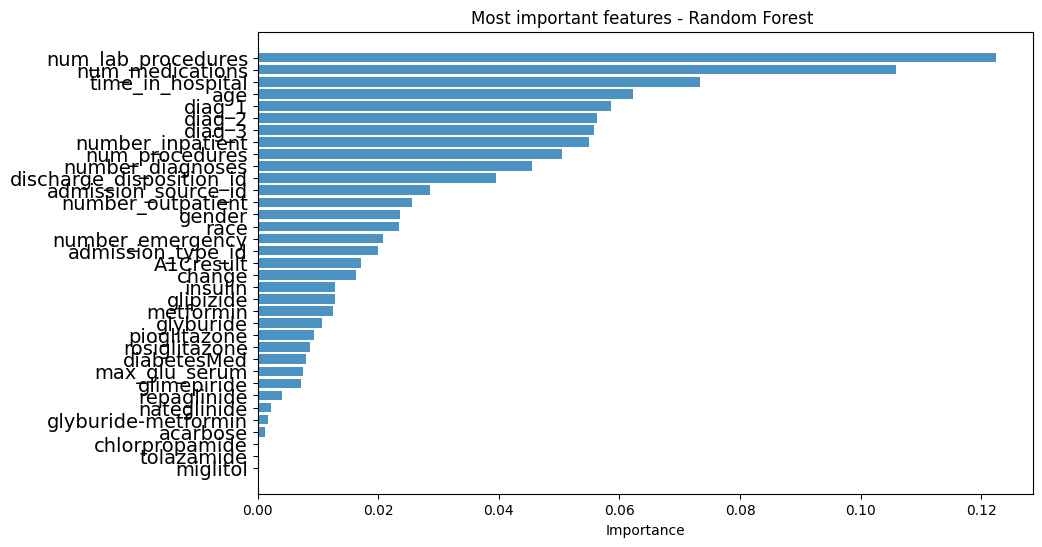

In [29]:
feature_names = X_train.columns
feature_imports = rf.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(35, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest ')
plt.show()

In [64]:
#if shows X has xx features but rf need xx features 
## please re-run the random forest part above


#!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

     |████████████████████████████████| 106 kB 19.8 MB/s 


Weight,Feature
0.0002 ± 0.0002,number_emergency
0.0002 ± 0.0001,number_outpatient
0.0002 ± 0.0001,number_inpatient
0.0002 ± 0.0002,number_diagnoses
0.0001 ± 0.0002,diag_3
0.0001 ± 0.0002,diag_1
0.0000 ± 0.0001,glipizide
0.0000 ± 0.0002,change
0.0000 ± 0.0002,race
0.0000 ± 0.0002,num_procedures


## PDP - Partial Dependence Plot

In [65]:
predictors = list(X_train)[:]
predictors

['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed']

In [66]:
 #!pip install pdpbox

     |████████████████████████████████| 34.0 MB 9.4 MB/s 
     |████████████████████████████████| 13.1 MB 30.4 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=79ca9a0aa49237fb7f34631459f455cf45cd51639f447c815ce65593074dd8d3
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


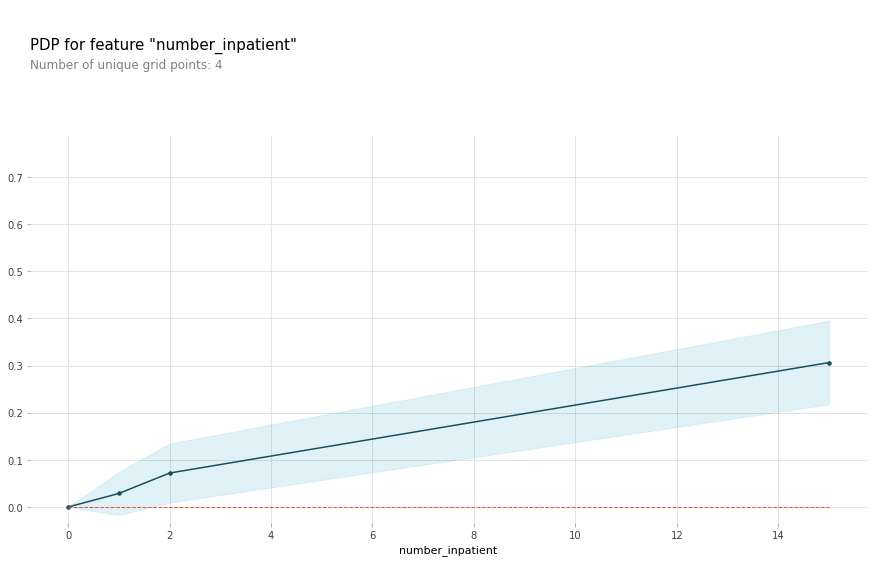

In [67]:
from pdpbox import pdp, info_plots

predictors = list(X_train)[:]
feature_name = 'number_inpatient' 
pdp_dist = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=predictors, feature=feature_name)

pdp.pdp_plot(pdp_dist, feature_name) 
plt.show()

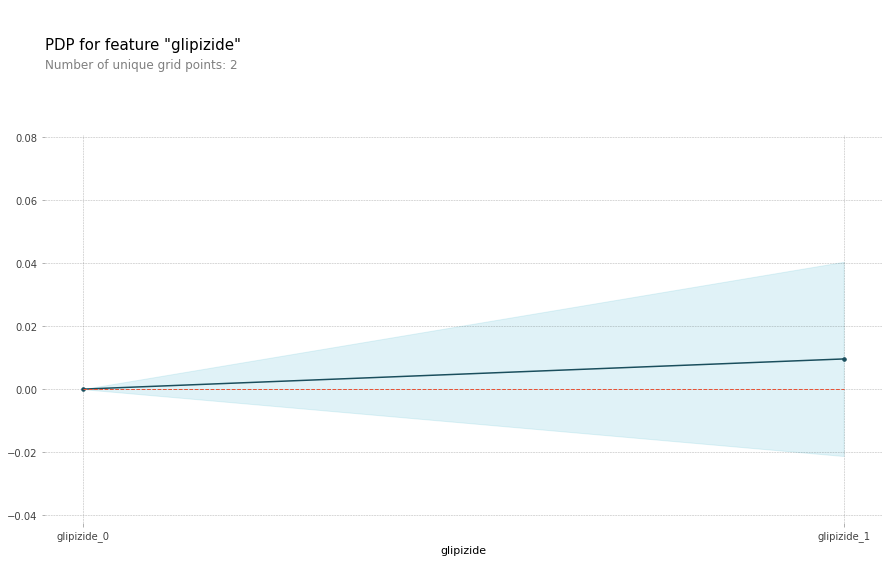

In [68]:
feature_name = 'glipizide'
pdp_dist = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=predictors, feature=feature_name)

pdp.pdp_plot(pdp_dist, feature_name)
plt.show()

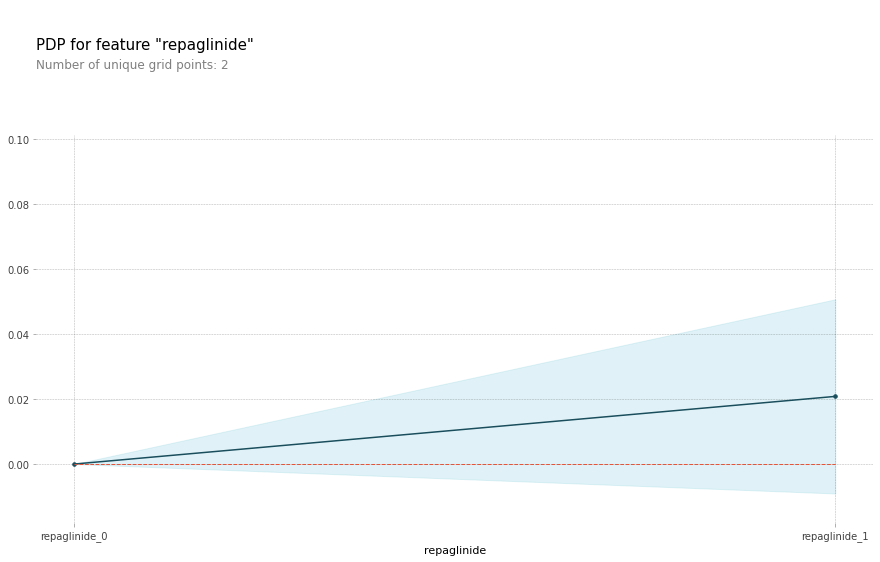

In [69]:
feature_name = 'repaglinide'
pdp_dist = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=predictors, feature=feature_name)

pdp.pdp_plot(pdp_dist, feature_name)
plt.show()

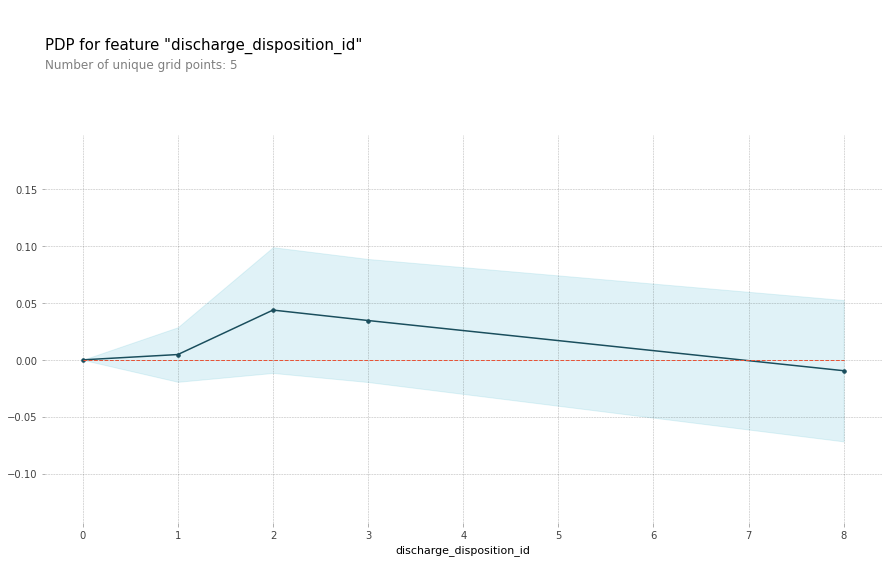

In [70]:
feature_name = 'discharge_disposition_id'
pdp_dist = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=predictors, feature=feature_name)

pdp.pdp_plot(pdp_dist, feature_name)
plt.show()

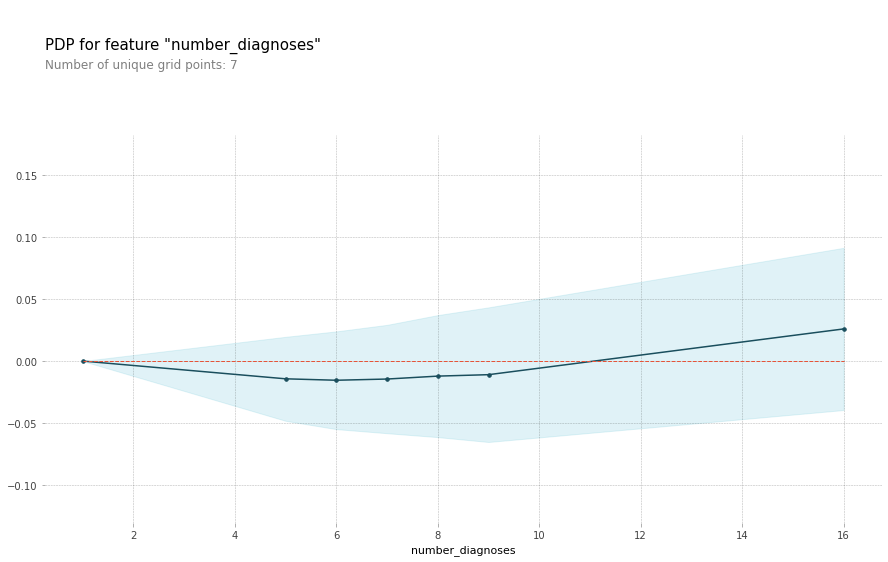

In [71]:
feature_name = 'number_diagnoses'
pdp_dist = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=predictors, feature=feature_name)

pdp.pdp_plot(pdp_dist, feature_name)
plt.show()

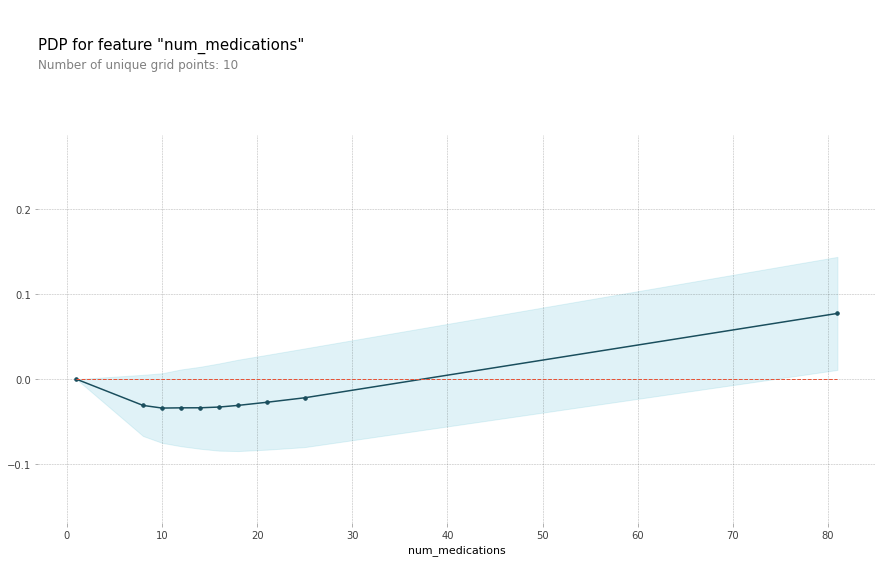

In [72]:
feature_name = 'num_medications'
pdp_dist = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=predictors, feature=feature_name)

pdp.pdp_plot(pdp_dist, feature_name)
plt.show()

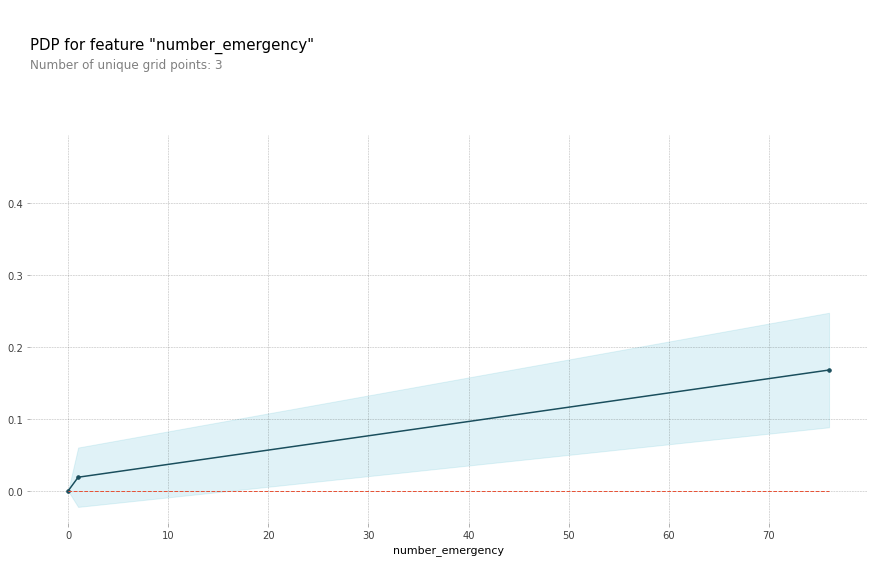

In [73]:
feature_name = 'number_emergency'
pdp_dist = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=predictors, feature=feature_name)

pdp.pdp_plot(pdp_dist, feature_name)
plt.show()

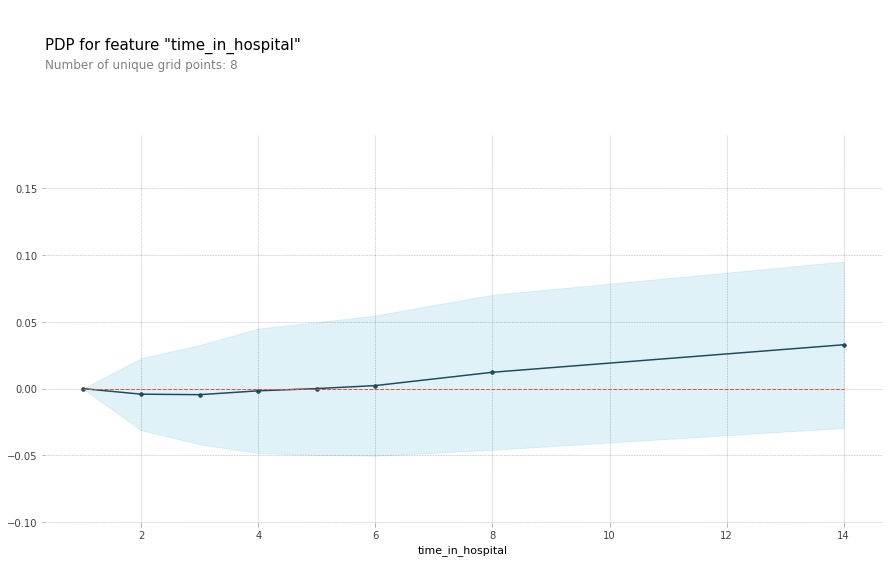

In [74]:
feature_name = 'time_in_hospital'
pdp_dist = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=predictors, feature=feature_name)

pdp.pdp_plot(pdp_dist, feature_name)
plt.show()

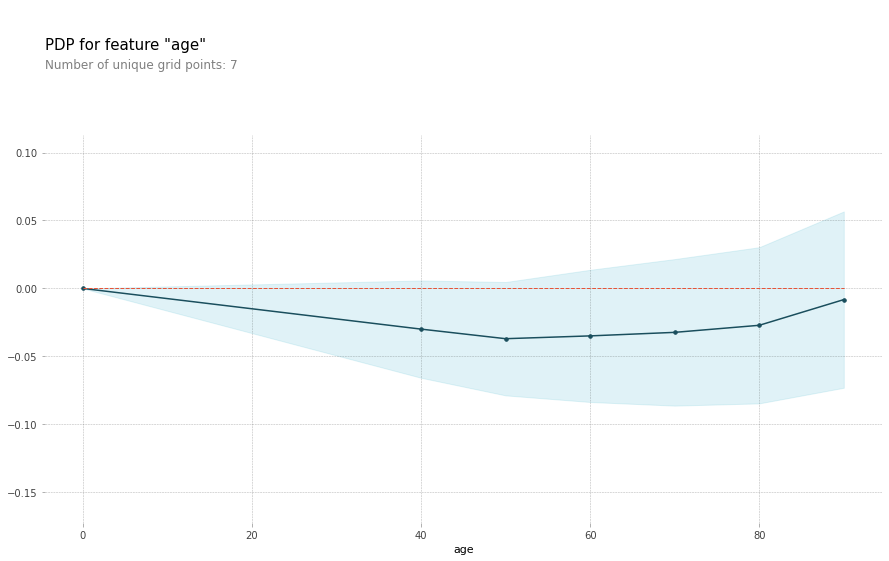

In [75]:
feature_name = 'age'
pdp_dist = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=predictors, feature=feature_name)

pdp.pdp_plot(pdp_dist, feature_name)
plt.show()

### 2D PDP

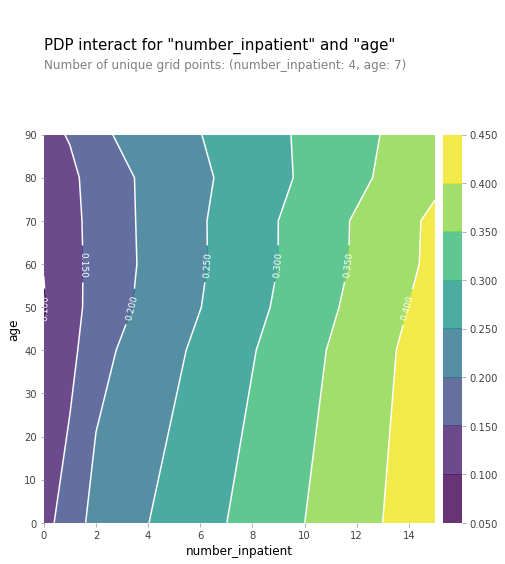

In [76]:
inter1  =  pdp.pdp_interact(model=rf, dataset=X_test, model_features=predictors, features=['number_inpatient', 'age'])

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=['number_inpatient', 'age'], plot_type='contour')
plt.show()

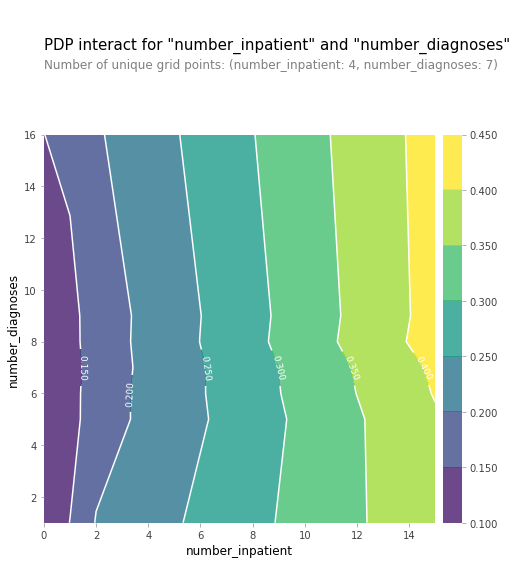

In [77]:
inter1  =  pdp.pdp_interact(model=rf, dataset=X_test, model_features=predictors, features=['number_inpatient', 'number_diagnoses'])

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=['number_inpatient', 'number_diagnoses'], plot_type='contour')
plt.show()

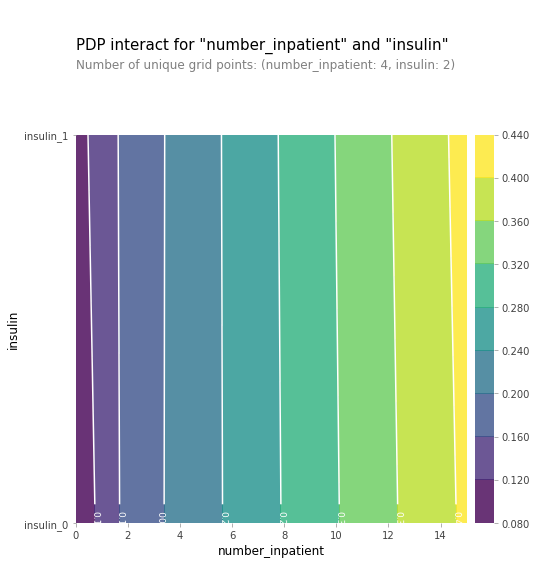

In [78]:
inter1  =  pdp.pdp_interact(model=rf, dataset=X_test, model_features=predictors, features=['number_inpatient', 'insulin'])

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=['number_inpatient', 'insulin'], plot_type='contour')
plt.show()

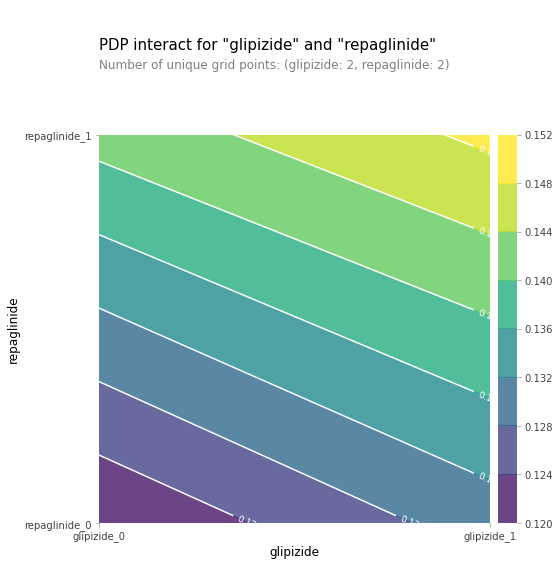

In [79]:
inter1  =  pdp.pdp_interact(model=rf, dataset=X_test, model_features=predictors, features=['glipizide', 'repaglinide'])

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=['glipizide', 'repaglinide'], plot_type='contour')
plt.show()

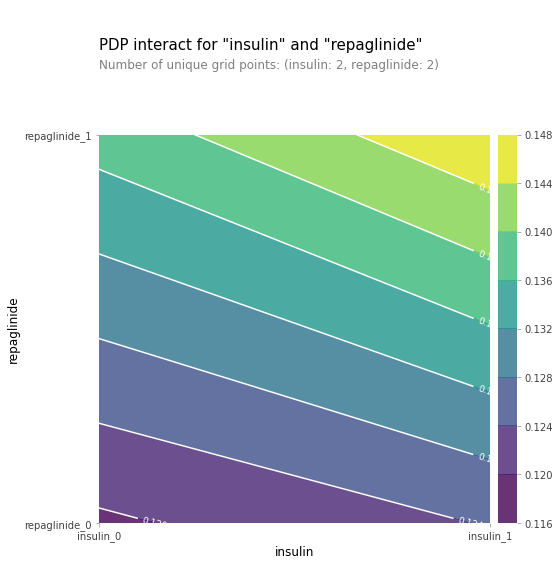

In [80]:
inter1  =  pdp.pdp_interact(model=rf, dataset=X_test, model_features=predictors, features=['insulin', 'repaglinide'])

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=['insulin', 'repaglinide'], plot_type='contour')
plt.show()

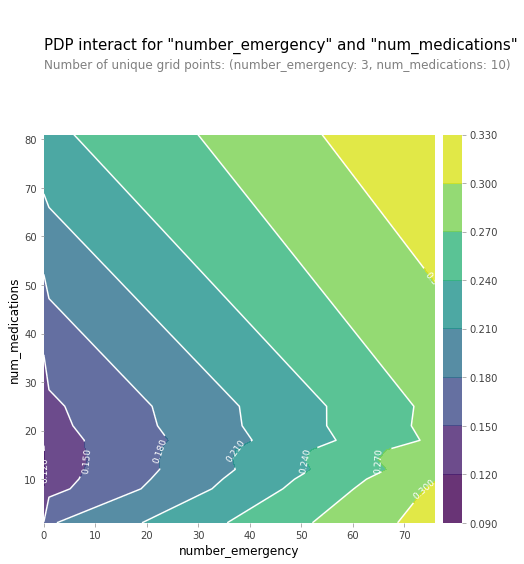

In [81]:
inter1  =  pdp.pdp_interact(model=rf, dataset=X_test, model_features=predictors, features=['number_emergency', 'num_medications'])

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=['number_emergency', 'num_medications'], plot_type='contour')
plt.show()

## SHAP - SHapley Additive exPlanations

In [84]:
#!pip install shap

     |████████████████████████████████| 564 kB 13.2 MB/s 


In [85]:
import shap

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=2)
rf=RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10, random_state=2)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=25, min_samples_split=10, n_estimators=10,
                       random_state=2)

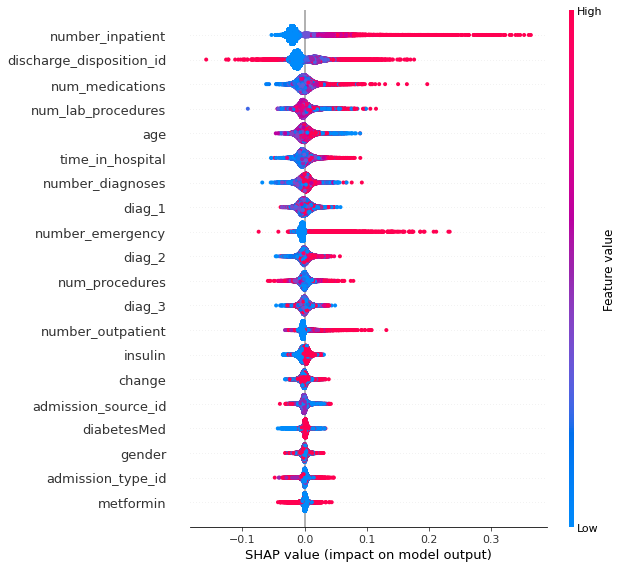

In [91]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)

### Predict NEW patient - single

In [ ]:
def heart_disease_risk_factors(model, patient):

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(patient)
    shap.initjs()
    return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

In [ ]:
data_for_prediction = # samples/rows，for example: X_test.iloc[1,:].astype(float)
readmission_risk_factors(rf, data_for_prediction)

### Predict NEW patient - multiple

In [ ]:
samples = # samples/rows，for example: (X_train.iloc[:50])
shap_values = explainer.shap_values(samples)
shap.force_plot(explainer.expected_value[1], shap_values[1], samples)